# This Notebook creates a ML model that can predict the survivors from the titanic shipwreck. 
## Created by iHasib at 09.09.24

This is my work for the participation in Kaggle Competition of `Titanic - Machine Learning from Disaster`. Here's the Link to the competition: https://www.kaggle.com/competitions/titanic/

In [1]:
# Importing the necessary instruments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("titanic/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Splitting X & y
X = df_train.drop("Survived", axis=1)
y = df_train["Survived"]

In [4]:
len(X), len(y)

(891, 891)

In [5]:
# Checking to see if there are missing data
X.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Since the `Age`, `Embarked` & `Cabin` columns have missing data, we need to deal with them before training**

### Dealing with the `Age`

In [6]:
# Finding the min & max Age
np.min(X["Age"]), np.max(X["Age"])

(0.42, 80.0)

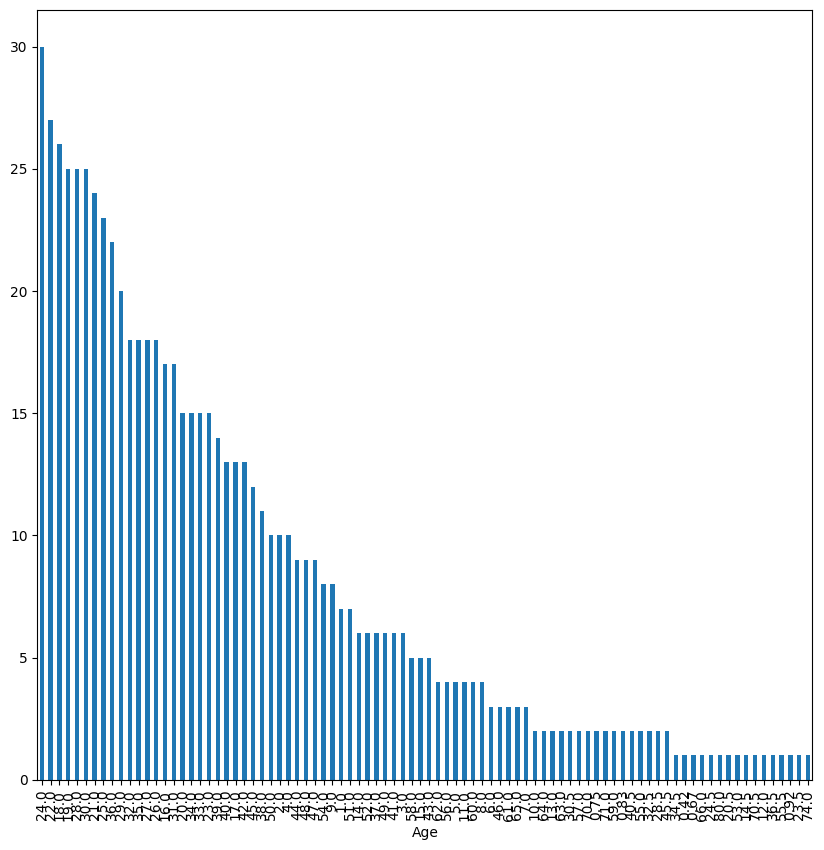

In [7]:
# Visualizing the Age Data
X["Age"].value_counts().plot.bar(figsize=(10,10));

**After Visualization, it seems like median should be the perfect option to fill!!**

In [8]:
# Filling the missing age data
X["Age"] = X["Age"].fillna(X["Age"].median())

In [9]:
# Checking to see if the missing Age data has been filled
X.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Dealing with the `Cabin`

In [10]:
# Checking the number of unique instances of Cabin
len(X["Cabin"].unique()), len(X)

(148, 891)

In [11]:
891-148

743

In [12]:
X["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

**Since there are no classes that take up majority, so we would fill the missing values with `missing`**

In [13]:
X["Cabin"] = X["Cabin"].fillna("missing")
X.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

### Dealing with Embark

In [14]:
# Checking out the different types of values
X["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

**Since we found a majority here which is `S` (644), also since the number of missing is just 2. So we would fill the missing with 'S'**

In [15]:
# Fill the missing values and check the total missing values in the dataset
X["Embarked"] = X["Embarked"].fillna("S")
X.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Since the features are not in Binary, we need to convert them using OneHotEncoder

In [40]:
X#["Name"].value_counts()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,missing,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,missing,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
X = X.drop("Name", axis=1)
X = X.drop("Ticket", axis=1)
X = X.drop("Cabin", axis=1)

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
cat_features = ["Pclass", "Sex", "SibSp", "Parch","Embarked"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, cat_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[  0.    ,   0.    ,   1.    , ...,   1.    ,  22.    ,   7.25  ],
       [  1.    ,   0.    ,   0.    , ...,   2.    ,  38.    ,  71.2833],
       [  0.    ,   0.    ,   1.    , ...,   3.    ,  26.    ,   7.925 ],
       ...,
       [  0.    ,   0.    ,   1.    , ..., 889.    ,  28.    ,  23.45  ],
       [  1.    ,   0.    ,   0.    , ..., 890.    ,  26.    ,  30.    ],
       [  0.    ,   0.    ,   1.    , ..., 891.    ,  32.    ,   7.75  ]])

In [43]:
transformed_X = pd.DataFrame(transformed_X)

In [44]:
transformed_X

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,22.0,7.2500
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,38.0,71.2833
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,26.0,7.9250
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,35.0,53.1000
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,35.0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,887.0,27.0,13.0000
887,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,888.0,19.0,30.0000
888,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,889.0,28.0,23.4500
889,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,890.0,26.0,30.0000


## Training Begins:

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(transformed_X, y, test_size=0.7)

np.random.seed(99)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [46]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
y_preds = clf.predict(X_val)

In [51]:
clf.score(X_val, y_val)

0.7916666666666666

## Evaluating the model

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [54]:
accuracy_score(y_val, y_preds)

0.7916666666666666

In [55]:
precision_score(y_val, y_preds)

0.7071129707112971

In [56]:
recall_score(y_val, y_preds)

0.7379912663755459

In [62]:
f1_score(y_val, y_preds)

0.7222222222222222

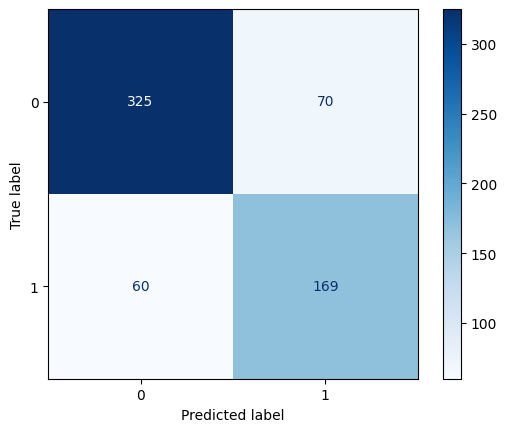

In [61]:
CMD = confusion_matrix(y_val, y_preds)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=CMD)
disp.plot(cmap=plt.cm.Blues)
plt.show()


### Tuning the model for better Performance

In [63]:
# TO-DO